In [16]:
import pickle
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.models import model_from_json

In [23]:
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
# loading  tokenizer
with open('../models/ks_tokenizer.pk', 'rb') as handle:
    tokenizer = pickle.load(handle)
    
# loading the model reconstruction from JSON file
with open('../models/model_blstm.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('../models/model_blstm.h5')

In [12]:
in_text = ['jeg elsker pizza','jeg elsker ikke pizza']

In [13]:
tokenizer.texts_to_sequences(pd.DataFrame({'text':in_text}).text)

[[3, 1, 1], [3, 1, 8, 1]]

In [14]:
def pre_text(in_text:list):
    '''
    takes in in_text as a list of sentences
    '''
    return pad_sequences(
            tokenizer.texts_to_sequences(
                pd.DataFrame({'text':in_text}).text),
                    maxlen=300)

In [15]:
pre_text(in_text)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [22]:
model.predict_proba(pre_text(in_text))

array([[0.27855924, 0.7214407 ],
       [0.6389748 , 0.3610252 ]], dtype=float32)

In [26]:
with open('../models/model_blstm_history.pk', 'rb') as handle:
    blstm = pickle.load(handle)

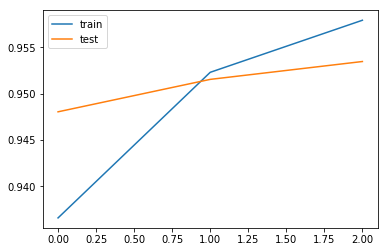

In [29]:
# plot history
plt.plot(blstm.history['acc'], label='train')
plt.plot(blstm.history['val_acc'], label='test')
plt.legend();